## Load from libraries

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 90s 1us/step


# Preprocessing

In [5]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

# build the architecture

In [7]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


c:\Users\manas\Desktop\dl\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
result=model.fit(x_train,y_train_cat,epochs=50,batch_size=64,validation_split=0.2)
                 
                 

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.2470 - loss: 6.7537 - val_accuracy: 0.2794 - val_loss: 3.1616
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.3072 - loss: 2.6695 - val_accuracy: 0.3254 - val_loss: 2.3718
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.3417 - loss: 2.1790 - val_accuracy: 0.3288 - val_loss: 2.3283
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.3711 - loss: 1.9315 - val_accuracy: 0.3725 - val_loss: 1.9074
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.3867 - loss: 1.8208 - val_accuracy: 0.3883 - val_loss: 1.8253
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.4130 - loss: 1.7113 - val_accuracy: 0.3910 - val_loss: 1.7816
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.4300 - loss: 1.6445 - val_accuracy: 0.4129 - val_loss: 1.7413
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.4347 - loss: 1.6124 - 

In [14]:
loss,test_accuracy=model.evaluate(x_test,y_test_cat)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4941 - loss: 2.1216
0.49410000443458557


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
predicted label:9


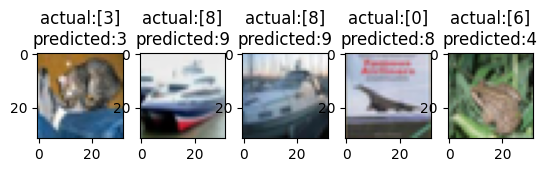

In [13]:
predictions=model.predict(x_test)
predict_label=np.argmax(predictions,axis=1)
print(f"predicted label:{predict_label[1]}")

#Print the predicted image
for i in range(5):
    #print(f"actual:{y_test[i]}\npredicted:{predict_label[i]}")
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"actual:{y_test[i]}\npredicted:{predict_label[i]}")
plt.show()

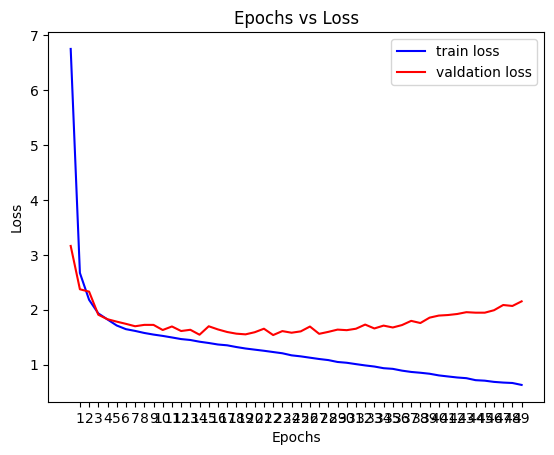

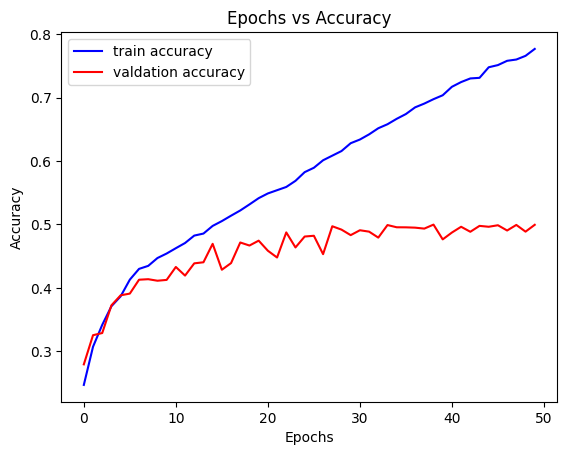

In [15]:
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xticks(np.arange(1,50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()
